# CleanStream AI: Enterprise Data Steward Dashboard

**Overview**
Welcome to the executive summary for the CleanStream Agent System. This dashboard provides a transparent view of how our Multi-Agent Architecture (Analyst, Coder, Reviewer) processed the batch of raw enterprise data.

**The Objective**
We are evaluating the performance of the agents based on three key metrics:
1.  **Data Quality:** Reduction in null values and formatting errors.
2.  **Data Integrity:** Preservation of valid data rows.
3.  **Autonomous Reasoning:** The logic used by the agents to determine fixes.

**How to use this Dashboard**
Scroll down to view the **Interactive Report Cards**. Each card contains the agent's logic on the left and a visual impact chart on the right. At the end, you can download a full **PDF Report**.

### System setup

In [21]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import io
import base64
from IPython.display import display, HTML
from fpdf import FPDF

# Configuration Paths
RAW_DIR = "data/raw"
CLEAN_DIR = "data/clean"
REPORT_FILE = "processing_report.json"
TEMP_IMG_DIR = "temp_images" 

# Create a temporary folder to store charts for the PDF report
os.makedirs(TEMP_IMG_DIR, exist_ok=True)

# Set the visual style for charts
sns.set_theme(style="whitegrid")

print("System initialized. Dashboard tools loaded.")

System initialized. Dashboard tools loaded.


### Loading the Flight Recorder

We begin by loading the `processing_report.json` file. This file acts as the "Black Box" for our agents, containing every decision, line of code, and quality score generated during the backend execution.

In [22]:
# Check if the report file exists
if not os.path.exists(REPORT_FILE):
    print("Error: No report found. Please run 'main.py' first to generate data.")
    data = []
else:
    # Load the JSON data
    with open(REPORT_FILE, 'r') as f:
        data = json.load(f)
    print(f"Successfully loaded execution records for {len(data)} datasets.")

Successfully loaded execution records for 4 datasets.


### Impact Analysis & Visualization
The following logic performs a deep-dive analysis on every processed file. 

**What happens in this step:**
1.  **Comparison:** It loads the original (Raw) and fixed (Clean) CSV files.
2.  **Calculation:** It computes the percentage of errors fixed.
3.  **Visualization:** It generates a bar chart comparing the Before/After states.
4.  **Formatting:** It prepares the images for both the HTML dashboard and the PDF report.

In [23]:
def analyze_and_visualize(filename, quality_score):
    """
    Analyzes data and creates TWO separate charts (Nulls and Rows).
    """
    raw_path = os.path.join(RAW_DIR, filename)
    clean_path = os.path.join(CLEAN_DIR, f"clean_{filename}")
    
    if not os.path.exists(clean_path): return None

    # 1. Load DataFrames
    df_raw = pd.read_csv(raw_path)
    df_clean = pd.read_csv(clean_path)
    
    # 2. Calculate Statistics
    raw_nulls = df_raw.isnull().sum().sum()
    clean_nulls = df_clean.isnull().sum().sum()
    null_reduction = raw_nulls - clean_nulls
    percent_fixed = (null_reduction / raw_nulls * 100) if raw_nulls > 0 else 100
    
    # 3. Generate Text Explanation (No Emojis)
    explanation = "<b>Data Integrity Analysis:</b><br>"
    if raw_nulls > 0:
        explanation += f"- Missing Values: Removed {null_reduction} nulls ({percent_fixed:.1f}% improvement).<br>"
    else:
        explanation += f"- Missing Values: Input data was complete.<br>"
        
    row_diff = len(df_raw) - len(df_clean)
    if row_diff == 0:
        explanation += f"- Row Count: 100% of rows preserved.<br>"
    else:
        explanation += f"- Row Count: {row_diff} rows were dropped.<br>"

    # 4. Generate Chart 1: Missing Values
    fig1, ax1 = plt.subplots(figsize=(6, 3))
    sns.barplot(x=['Raw', 'Clean'], y=[raw_nulls, clean_nulls], ax=ax1, palette=['#e74c3c', '#2ecc71'])
    ax1.set_title("Metric 1: Missing Values (Lower is Better)")
    ax1.set_ylabel("Count")
    plt.tight_layout()
    
    # Save Chart 1
    img1_path = f"{TEMP_IMG_DIR}/{filename}_nulls.png"
    plt.savefig(img1_path)
    
    buf1 = io.BytesIO()
    plt.savefig(buf1, format='png')
    buf1.seek(0)
    img1_base64 = base64.b64encode(buf1.getvalue()).decode('utf-8')
    plt.close(fig1)

    # 5. Generate Chart 2: Row Count
    fig2, ax2 = plt.subplots(figsize=(6, 3))
    sns.barplot(x=['Raw', 'Clean'], y=[len(df_raw), len(df_clean)], ax=ax2, palette=['#95a5a6', '#3498db'])
    ax2.set_title("Metric 2: Data Preservation (Higher is Better)")
    plt.tight_layout()
    
    # Save Chart 2
    img2_path = f"{TEMP_IMG_DIR}/{filename}_rows.png"
    plt.savefig(img2_path)
    
    buf2 = io.BytesIO()
    plt.savefig(buf2, format='png')
    buf2.seek(0)
    img2_base64 = base64.b64encode(buf2.getvalue()).decode('utf-8')
    plt.close(fig2)
    
    return {
        "explanation": explanation,
        "pdf_img_nulls": img1_path,
        "pdf_img_rows": img2_path,
        "html_img_nulls": img1_base64,
        "html_img_rows": img2_base64,
        "clean_text_explanation": explanation.replace("<b>", "").replace("</b>", "").replace("<br>", "\n")
    }

### 3. Agent Performance Cards
Below is the detailed breakdown for each file processed. 

**Legend:**
* **Green Grade:** High confidence fix (Score > 80)
* **Orange Grade:** Moderate confidence (Score 50-80)
* **Red Grade:** Low confidence or failure (Score < 50)

C:\Users\vrund\AppData\Local\Temp\ipykernel_5728\2189791803.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Raw', 'Clean'], y=[raw_nulls, clean_nulls], ax=ax1, palette=['#e74c3c', '#2ecc71'])
C:\Users\vrund\AppData\Local\Temp\ipykernel_5728\2189791803.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Raw', 'Clean'], y=[len(df_raw), len(df_clean)], ax=ax2, palette=['#95a5a6', '#3498db'])
C:\Users\vrund\AppData\Local\Temp\ipykernel_5728\2189791803.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Raw', 'Clean'], y=[raw_n


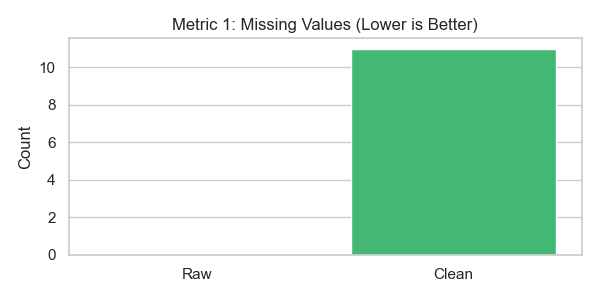
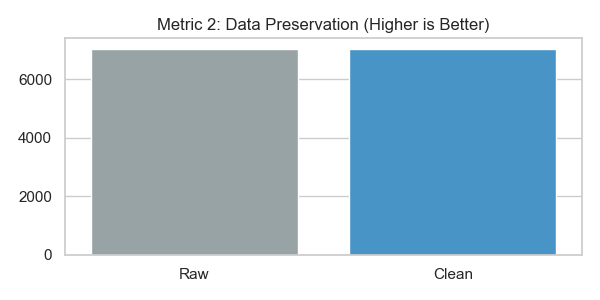
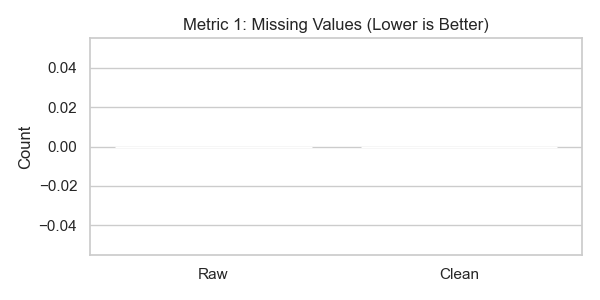
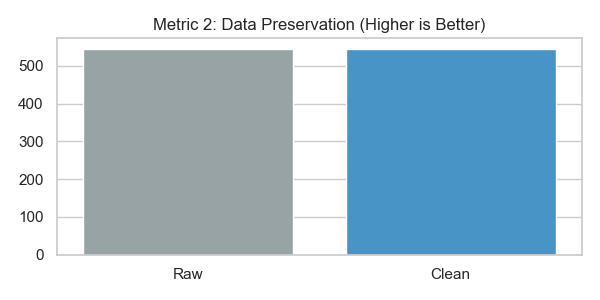
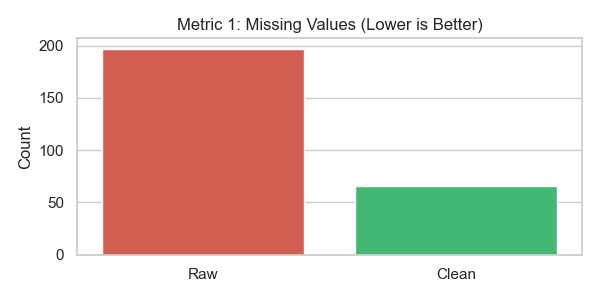
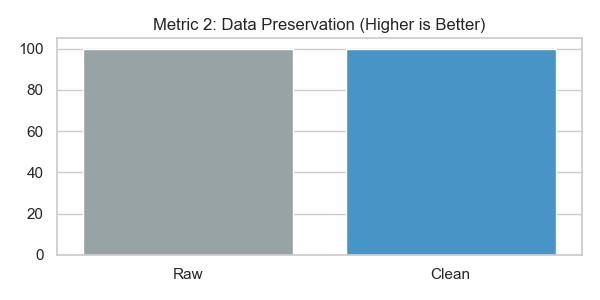

Generating PDF Report... Please wait.


In [24]:
import re

# --- Helper: Convert AI Markdown to HTML ---
def format_text(text):
    if not text: return ""
    # 1. Convert Bold: **text** -> <b>text</b>
    text = re.sub(r'\*\*(.*?)\*\*', r'<b>\1</b>', text)
    # 2. Convert Bullets: * text -> • text
    text = text.replace('\n* ', '<br>• ').replace('\n- ', '<br>• ')
    # 3. Handle remaining newlines
    text = text.replace('\n', '<br>')
    return text

# --- HTML CSS Styles (Stacked Layout) ---
html_output = """
<style>
    .card { border: 1px solid #e0e0e0; padding: 25px; margin-bottom: 40px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.05); font-family: 'Segoe UI', Arial, sans-serif; background: white; }
    
    /* Header */
    .header { display: flex; justify-content: space-between; align-items: center; border-bottom: 2px solid #f0f0f0; padding-bottom: 15px; margin-bottom: 20px; }
    .filename { font-size: 1.5em; font-weight: 700; color: #2c3e50; }
    .score-badge { padding: 8px 16px; border-radius: 20px; color: white; font-weight: bold; font-size: 1em; letter-spacing: 0.5px; }
    .score-high { background-color: #27ae60; }
    .score-med { background-color: #f39c12; }
    .score-low { background-color: #c0392b; }

    /* Layout: Stacked */
    .content-container { display: flex; flex-direction: column; gap: 20px; }
    
    /* Text Section */
    .text-section { background: #fff; }
    .section-label { font-weight: 800; color: #34495e; font-size: 0.9em; text-transform: uppercase; margin-bottom: 8px; margin-top: 20px; border-bottom: 2px solid #eee; padding-bottom: 5px; width: 100%; }
    .finding-text { font-size: 1em; color: #444; line-height: 1.6; }

    /* Visualization Section (Side by Side Images) */
    .viz-section { display: flex; gap: 20px; justify-content: center; margin-top: 10px; flex-wrap: wrap; }
    .viz-img { width: 48%; border: 1px solid #ddd; border-radius: 8px; box-shadow: 0 2px 5px rgba(0,0,0,0.05); min-width: 300px; }

    /* Insight Box */
    .insight-box { background-color: #f0f8ff; padding: 15px; border-left: 5px solid #3498db; margin-top: 25px; font-size: 0.95em; border-radius: 4px; color: #2c3e50; }
</style>
<h1>Batch Execution Report</h1>
"""

pdf_data_cache = []

if 'data' in locals() and data:
    for record in data:
        if record['status'] == 'Success':
            # Run Analysis
            analysis = analyze_and_visualize(record['filename'], record.get('quality_score', 0))
            
            if analysis:
                record['analysis'] = analysis
                pdf_data_cache.append(record)
                
                # HTML Construction
                score = record.get('quality_score', 0)
                color_class = "score-high" if score >= 80 else "score-med" if score >= 50 else "score-low"
                
                # FIX: Use the helper function to clean up the Markdown
                analyst_text = format_text(record['issues_detected'])
                reviewer_text = format_text(record['reviewer_comments'])
                
                html_output += f"""
                <div class="card">
                    <div class="header">
                        <span class="filename">Dataset: {record['filename']}</span>
                        <span class="score-badge {color_class}">Grade: {score}/100</span>
                    </div>
                    
                    <div class="content-container">
                        <div class="text-section">
                            <div class="section-label">Analyst Findings</div>
                            <div class="finding-text">{analyst_text}</div>
                            
                            <div class="section-label">Reviewer Comments</div>
                            <div class="finding-text">{reviewer_text}</div>
                        </div>

                        <div class="section-label">Impact Visualization</div>
                        <div class="viz-section">
                            <img src="data:image/png;base64,{analysis['html_img_nulls']}" class="viz-img">
                            <img src="data:image/png;base64,{analysis['html_img_rows']}" class="viz-img">
                        </div>

                        <div class="insight-box">
                            {analysis['explanation']}
                        </div>
                    </div>
                </div>
                """
    
    # Display the Dashboard
    display(HTML(html_output))

    # --- PART 3: Generate PDF Button ---
    if pdf_data_cache:
        # Note: We rely on the PDF function defined in the previous steps/cells
        # If you removed it, ensure the 'generate_pdf_report' function is available.
        # Assuming the function exists from the previous turn:
        print("Generating PDF Report... Please wait.")
        try:
            pdf_file = generate_pdf_report(pdf_data_cache)
            display(HTML(f"""
            <div style="text-align: center; margin-top: 40px; margin-bottom: 50px;">
                <a href="{pdf_file}" download target="_blank" style="background-color: #2c3e50; color: white; padding: 18px 40px; text-decoration: none; border-radius: 8px; font-weight: bold; font-size: 1.3em; font-family: Arial; box-shadow: 0 4px 6px rgba(0,0,0,0.2);">
                    📥 Download Executive PDF Report
                </a>
            </div>
            """))
        except NameError:
             print("⚠️ PDF Generator function not found. Please ensure all cells are run.")
else:
    print("No data available to generate dashboard.")